<a href="https://colab.research.google.com/github/makhmudov-khondamir/Machine-Learning/blob/main/Predicting%20Diabetes%20Diagnosis%20Using%20K-Nearest%20Neighbors%3A%20A%20Data%20Science%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Diabetes Diagnosis Using K-Nearest Neighbors: A Data Science Project**
**Task**

The following dataset is from the National Institute of Diabetes and Kidney Diseases, India. The goal is to predict whether a patient has diabetes based on diagnostic measurements.

**Content**

All patients in the dataset are women at least 21 years old.

**Columns:**

1. Pregnancies
2. Glucose
3. BloodPressure
4. SkinThickness
5. Insulin
6. BMI
7. DiabetesPedigreeFunction
8. Age
9. Outcome

**Dataset**: https://github.com/anvarnarz/praktikum_datasets/blob/main/diabetes.csv

In [26]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn. model_selection import train_test_split, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, jaccard_score, f1_score
from sklearn.neighbors import KNeighborsClassifier


In [12]:
url = 'https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/diabetes.csv'
df = pd.read_csv(url)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [13]:
corr_matrix = df.corr().abs()

corr_matrix.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,0.113970,0.074752
Insulin,0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.113970,0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [84]:
correlations = df.corrwith(df['Outcome'])

# Apply absolute value to the correlations and sort
correlations.abs().sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64

**Why .abs() is used?**

 Correlation Significance: Correlation coefficients range from -1 to 1. A value of -1 indicates a perfect negative correlation, 1 indicates a perfect positive correlation, and 0 indicates no correlation. However, whether the correlation is positive or negative, the strength of the correlation is determined by the magnitude (absolute value) of the coefficient. For example, a correlation of -0.8 is just as strong as a correlation of 0.8.

In [17]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [20]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [22]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=10)

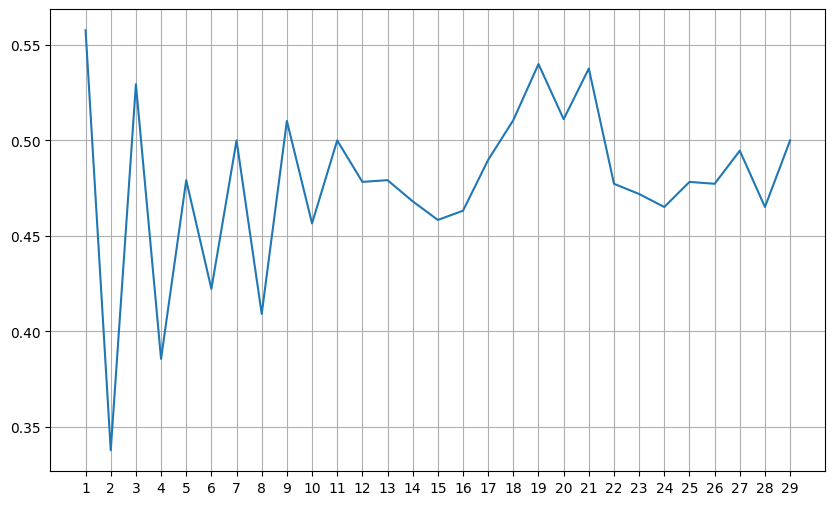

In [58]:
# Finding the best k
f1 = []
for k in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_predict = knn.predict(x_test)
    f1.append(f1_score(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,30),f1)
plt.xticks(range(1,30))
plt.grid()
plt.show()

In [59]:
# Using Grid Search
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 30)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5)
knn_gscv.fit(x, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [60]:
knn_gscv.cv_results_['rank_test_score']

array([29, 28, 20, 23, 27, 26, 22, 21, 25, 24, 19, 14,  7, 16,  5, 17,  1,
       10,  2, 13,  8, 15, 11, 18, 12,  4,  6,  9,  3], dtype=int32)

In [61]:
knn_gscv.best_params_

{'n_neighbors': 17}

In [62]:
best_k = knn_gscv.best_params_['n_neighbors']
knn_gscv.best_score_

0.7669892199303965

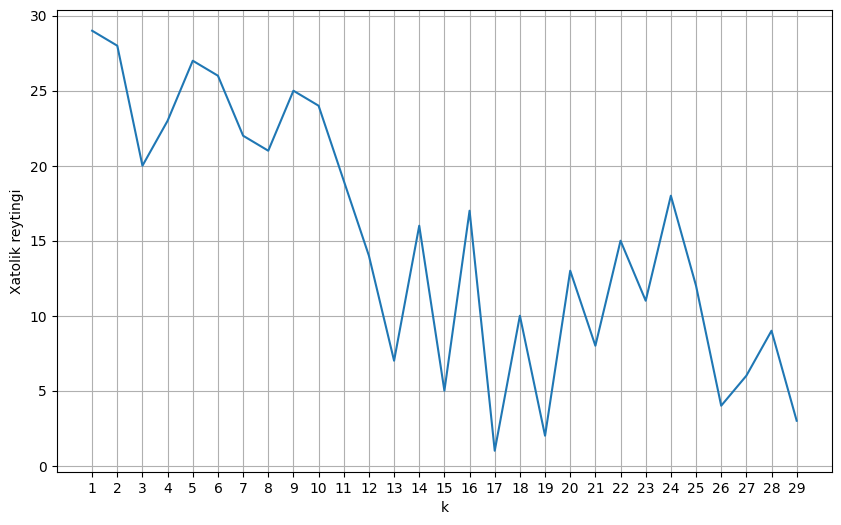

In [65]:
plt.figure(figsize=(10,6))
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel("k")
plt.ylabel("Xatolik reytingi")
plt.grid()
plt.show()

In [77]:
knn=KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [78]:
prediction=knn.predict(x_test)

In [79]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.70      0.84      0.76        95
           1       0.62      0.41      0.49        59

    accuracy                           0.68       154
   macro avg       0.66      0.62      0.63       154
weighted avg       0.66      0.68      0.66       154



In [80]:
jaccard_score(y_test,prediction)

0.32432432432432434

In [81]:
confusion_matrix(y_test, prediction)

array([[80, 15],
       [35, 24]])

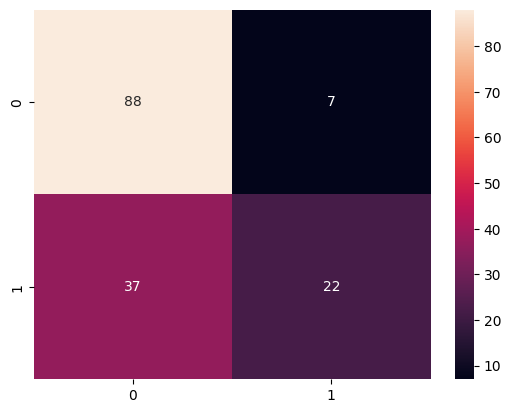

In [82]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

## **Cross_Validation**

In [91]:
predicted=cross_val_predict(knn, x,y, cv=5)

In [96]:
print(classification_report(y, predicted))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       500
           1       0.72      0.54      0.62       268

    accuracy                           0.77       768
   macro avg       0.75      0.71      0.73       768
weighted avg       0.76      0.77      0.76       768



# **Testing with new patient data**

In [102]:
new_patients = {
    'Pregnancies': [1, 5],
    'Glucose': [120, 150],
    'BloodPressure': [70, 80],
    'SkinThickness': [20, 25],
    'Insulin': [80, 120],
    'BMI': [30.0, 35.0],
    'DiabetesPedigreeFunction': [0.5, 0.7],
    'Age': [25, 45]
}
new_data = pd.DataFrame(new_patients)

In [111]:
newx=scaler.fit_transform(new_data)
outcome=knn.predict(newx)

In [112]:
outcome

array([0, 1])

### Summary and Conclusion

This classification model for predicting diabetes using the K-Nearest Neighbors (k-NN) algorithm demonstrates the following key points:

1. **Model Performance:**
   - The model achieved an F1 score of approximately 0.49 for class 1 (diabetes), indicating some challenges in accurately predicting patients who have diabetes.
   - The F1 score for class 0 (no diabetes) was significantly higher at 0.76, reflecting better performance in identifying patients who do not have diabetes.

2. **Evaluation Metrics:**
   - **Class 0 (No Diabetes):** The model has a precision of 0.70, recall of 0.84, and an F1 score of 0.76. This suggests that the model is relatively effective at predicting when a person does not have diabetes.
   - **Class 1 (Diabetes):** The precision is 0.62, recall is 0.41, and the F1 score is 0.49. These lower metrics indicate that the model struggles more with correctly identifying patients with diabetes.

3. **Confusion Matrix:**
   - The confusion matrix shows 80 true negatives and 24 true positives, but also highlights 35 false negatives and 15 false positives. This indicates that while the model correctly identifies many cases, it also misses a significant number of diabetes cases.

4. **Class Imbalance:**
   - The model performs better for class 0 compared to class 1, which suggests a potential class imbalance issue. The dataset may have more instances of class 0 (no diabetes) than class 1 (diabetes), impacting the model's ability to predict the minority class effectively.

5. **Model Tuning:**
   - Grid search results indicated that the best k-value was 17, which was used in the final model. This value provides a balance between overfitting and underfitting for the given dataset.

### Conclusion

In conclusion, the current model demonstrates better performance in predicting patients without diabetes (class 0) compared to those with diabetes (class 1). The precision, recall, and F1 score are notably higher for class 0, indicating that the model is more reliable in identifying non-diabetic cases. However, the lower performance metrics for class 1 highlight the need for further improvements, potentially through addressing class imbalance, adjusting model parameters, or exploring different algorithms to enhance the prediction accuracy for diabetic patients.